<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Assignment #3</center></h2>
<h3 style="margin-top:0"><center>Due: December 12, Sunday 23:59</center></h3>
<br>
<p style="margin-top:0"><center><b>This assignment is prepared for DI 501 - Introduction to Data Informatics course offered by  Middle East Technical University.</b></center></p>
<hr style="height:2px;color:navy;margin-top:0">
<p style="margin-top:0; text-align: justify; font-size:15px">The objectives of this assignment are:
    <li>You will be able to apply data preprocessing concepts on a given problem </li>
    <li>You will be able to understand and apply missingness mechanisms and imputation methods to a given problem.</li>
    <li>You will be able to perform data profiling.</li>
    
### Submission and Grading Policy ###
<p style="margin-top:0"><center><b></b></center></p>
  
- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_2.ipynb (e.g., “e123456_HW_2.ipynb”).
- Late submissions will be accepted by December 15, 2021, 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **<font color=#C91414>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 
- If needed, you are required to explain your reasonings by adding new blocks below your codes.

<h3 style="margin-bottom:0">Import Libraries</h3>

Here, please import the necessary libraries to conduct your analysis here.

In [1]:
### answer ###
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

<h3 style="margin-bottom:0">1) Data (5 pts)</h3>

We will be utilizing a dataset that is prepared particularly for this exercise. The meaning of individual elements is not important here but we will provide information which will be sufficient for you to conduct your further operations:
- x1: categorical variable that can take values between 0 and 4.
- x2: categorical variable that can take values of low, medium and high.
- x3: categorical variable that can take values of A, B, C and D.
- x4: continuous variable.
- x5: continuous variable.
- y: categorical variable that can take values between 0 and 3.

Please import data with correct delimiter here and retrieve the first 5 rows.

In [3]:
### answer ###
df = pd.read_csv("./data.csv", delimiter=",")
df.head(5)

,x1,x2,x3,x4,x5,y
0,3,MEDIUM,B,71.87353865111545,77.27994181308213,0
1,2,medium,C,76.32969292828467,123.50976228245605,3
2,2,medium,AB,84.72681676261608,94.11303401429247,0
3,1,low,D,90.89495327283925,131.0801255597466,0
4,1,medium,B,91.37755200701073,78.42142573456847,1


Check the datatypes of each column to see whether we need any adjustments.

In [4]:
### answer ###
df.dtypes

x1    object
x2    object
x3    object
x4    object
x5    object
y     object
dtype: object

<h3 style="margin-bottom:0">2) Preprocessing (45 pts)</h3>

<h4 style="margin-bottom:0">a) Numerical Values</h4>

First, convert x1, x4, x5 and y variables into numerical columns. In case of an invalid parsing, the value will be set as NaN. Once you have finished it, drop all the rows that have any null values. At the end, you are supposed to show that you have no null values. You should also use "downcast" parameter of to_numeric function of pandas and give your reasoning on specific choice.

In [5]:
### answer ###

# Since x1 variable can take values between 0 and 4, unsigned integer is sufficient to represent it. 
df["x1"] = pd.to_numeric(df["x1"], errors="coerce", downcast="unsigned")
# Similary, y variable can take values between 0 and 3, unsigned integer is sufficient to represent it.
df["y"] = pd.to_numeric(df["y"], errors="coerce", downcast="unsigned")
# x4 and x5 are continuous variables, hence they must be float.
df["x4"] = pd.to_numeric(df["x4"], errors="coerce", downcast="float")
df["x5"] = pd.to_numeric(df["x5"], errors="coerce", downcast="float")
print("Dataframe dtypes after conversion:")
print(df.dtypes)

print(f"NaN counts before dropping rows with a NaN value:")
print(df.isna().sum())

df = df.dropna(axis=0, how="any", subset=["x1", "x4", "x5", "y"])
print(f"NaN counts after dropping rows with a NaN value:")
print(df.isna().sum())


Dataframe dtypes after conversion:
x1    float64
x2     object
x3     object
x4    float32
x5    float32
y     float64
dtype: object
NaN counts before dropping rows with a NaN value:
x1    1
x2    0
x3    0
x4    2
x5    1
y     1
dtype: int64
NaN counts after dropping rows with a NaN value:
x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64


<h4 style="margin-bottom:0">b) Categorical Values</h4>

For x2, you have 3 categories. However, due to capitalization and spacing differences, you can see you have more than 3 categories. First, calculate the frequency of each different entry for x2 column.

In [6]:
### answer ###
df["x2"].value_counts()

medium      142
low          29
high         24
Medium        2
MEDIUM        1
medium        1
lOw           1
High          1
mEdium        1
 HIGH         1
me\ndium      1
 high         1
 medium       1
Low           1
Name: x2, dtype: int64

Now, convert all the entries into either "low", "medium" or "high" and show that you only have 3 different categories for that variable. 

In [7]:
### answer ###
def cleanup_x2(text):
    # hacky but works for this dataset
    first_letter = text.strip().lower()[0]
    mapping = {"l": "low", "m": "medium", "h": "high"}
    return mapping[first_letter]

df['x2'] = df['x2'].apply(cleanup_x2)
df['x2'].value_counts()

medium    149
low        31
high       27
Name: x2, dtype: int64

Finally, convert x2 into category data type.

In [8]:
### answer ###
df['x2'] = df['x2'].astype("category").cat.set_categories(['low', 'medium', 'high'], ordered=True)
df['x2'].dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

We also said, x3 can be A, B, C or D. Please find any value that is not either one of them and display them.

In [9]:
### answer ###
invalid_x3_mask = df['x3'].apply(lambda s: s not in {'A', 'B', 'C', 'D'})
print(df.loc[invalid_x3_mask, 'x3'])

2     AB
44     E
Name: x3, dtype: object


Now, drop all the rows that have an inconsistent value for x3.

In [10]:
### answer ###
df = df.drop(axis=0, index=df.index[invalid_x3_mask])
print(df.loc[df['x3'].apply(lambda s: s not in {'A', 'B', 'C', 'D'})])

Empty DataFrame
Columns: [x1, x2, x3, x4, x5, y]
Index: []


Finally, you can convert x3 into a category.

In [11]:
### answer ###
# assuming x3 values are not ordered
df['x3'] = df['x3'].astype("category").cat.set_categories(['A', 'B', 'C', 'D'], ordered=True)
df['x3'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D'], ordered=True)

In [12]:
df['x1'] = df['x1'].astype("category")
df['x1'].dtype

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0], ordered=False)

In [13]:
df['y'] = df['y'].astype("category")
df['y'].dtype

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0], ordered=False)

Show all of our dataset that each of our columns have correct datatypes.

In [14]:
### answer ###
df.dtypes

x1    category
x2    category
x3    category
x4     float32
x5     float32
y     category
dtype: object

<h4 style="margin-bottom:0">c) Duplicates</h4>

Find <b>full duplicates</b> and return the <b>first occurence</b> of the duplicate values here.

In [15]:
### answer ###
df[df.duplicated(keep='last')]

,x1,x2,x3,x4,x5,y
59,4.0,high,B,59.337509,47.873280,3.0
86,1.0,medium,D,93.266113,108.719963,0.0


Now, drop full duplicates and do that  with "inplace" and keep the last occurences.

In [16]:
### answer ###
df.drop_duplicates(keep='last', inplace=True)
df[df.duplicated(keep='last')]

,x1,x2,x3,x4,x5,y


<h3 style="margin-bottom:0">3) Dealing with Nulls (50 pts)</h3>

In this section, first construct three different datasets using the following constraints based on the above dataset:

DS1: One with MCAR missingness (at least with 20% missingness in two variables).

DS2: One with MAR missingness  (at least with 20% missingness in two variables).

DS3: One with MNAR missingness (at least with 20% missingness in two variables).

For each of the DS1, DS2, and DS3 datasets, you should:
- Explain your rationale while creating the missing patterns.
- Prove that your data missingness is in the desired form via missingno visualization methods as well as statistical measures (such as cross tabs).

Then, select one of them (DS1, DS2 or DS3) and create a training dataset which should be randomly created with 70% of the whole dataset. The testing dataset should include the remaining 30%. Ensure to distribute your missing tuples equally in both datasets. More specifically, 50% of the missing tuples should appear in training and 50% in the testing dataset. Finally:
- Apply 2 different types of imputation methods other than deleting column or row. Use your training dataset only while working with imputation techniques. For instance, if you prefer to fill a certain missing data with the mean of the variable, you should calculate the mean on the training dataset only. Then use this calculated value while filling the missing value of that corresponding attribute in the testing dataset.
- Compare imputation methods' performance by looking at the correct values on your training and testing dataset separately. For comparison purposes, you can use metrics such as mean squared error, F-score or etc.

You should do those steps in order and you can add as many cells as you want below. However, please use markdown cells regularly to clarify your steps. I will not be able to fully grade you unless I understand what you did in your codes.

Some useful websites: <br>
<a href="https://rmisstastic.netlify.app/how-to/python/generate_html/how%20to%20generate%20missing%20values"> link </a> <br>
<a href="https://stats.stackexchange.com/questions/462507/how-to-decide-whether-missing-values-are-mar-mcar-or-mnar"> link </a>

In [17]:
import numpy as np
from scipy import optimize

import missingno as msno

### Generate MCAR, MAR and MNAR datasets

Let's first define the functions to create MCAR, MAR and MNAR missing masks

- x1: categorical variable that can take values between 0 and 4.
- x2: categorical variable that can take values of low, medium and high.
- x3: categorical variable that can take values of A, B, C and D.
- x4: continuous variable.
- x5: continuous variable.
- y: categorical variable that can take values between 0 and 3.

For MCAR missing values, since it's completely random, we can generate random values and use them as missingness mask.

In [18]:
def missing_rate_of(mask):
    return mask.sum(axis=0) / mask.shape[0]

#
def MCAR_mask(X, p, max_trials=100):
    shape = X.shape
    i = 0
    while i < max_trials:
        i += 1
        mask = np.random.rand(*shape) <= (p + 0.05)
        if np.min(missing_rate_of(mask)) >= p:
            return mask
    raise ValueError(f"Can't generate a missing mask for rate {rate}")

In [19]:
# from https://github.com/BorisMuzellec/MissingDataOT/blob/master/utils.py

def MAR_mask(X, p, p_obs):
    """
    Missing at random mechanism with a logistic masking model. First, a subset of variables with *no* missing values is
    randomly selected. The remaining variables have missing values according to a logistic model with random weights,
    re-scaled so as to attain the desired proportion of missing values on those variables.
    Parameters
    ----------
    X : np.ndarray, shape (n, d)
        Data for which missing values will be simulated. If a numpy array is provided,
        it will be converted to a pytorch tensor.
    p : float
        Proportion of missing values to generate for variables which will have missing values.
    p_obs : float
        Proportion of variables with *no* missing values that will be used for the logistic masking model.
    Returns
    -------
    mask : np.ndarray (depending on type of X)
        Mask of generated missing values (True if the value is missing).
    """

    n, d = X.shape

    mask = np.zeros((n, d)).astype(bool)

    d_obs = max(int(p_obs * d), 1) ## number of variables that will have no missing values (at least one variable)
    d_na = d - d_obs ## number of variables that will have missing values

    ### Sample variables that will all be observed, and those with missing values:
    idxs_obs = np.random.choice(d, d_obs, replace=False)
    idxs_nas = np.array([i for i in range(d) if i not in idxs_obs])

    ### Other variables will have NA proportions that depend on those observed variables, through a logistic model
    ### The parameters of this logistic model are random.

    ### Pick coefficients so that W^Tx has unit variance (avoids shrinking)
    coeffs = pick_coeffs(X, idxs_obs, idxs_nas)
    ### Pick the intercepts to have a desired amount of missing values
    intercepts = fit_intercepts(X[:, idxs_obs], coeffs, p)

    ps = sigmoid(X[:, idxs_obs].mm(coeffs) + intercepts)

    ber = np.random.rand(n, d_na)
    mask[:, idxs_nas] = ber < ps

    return mask


For MNAR missing values, the missing values must depend on the values of variables. 
Hence, we use logistic regression with the data as input to generate missingness mask.

In [20]:
# from https://github.com/BorisMuzellec/MissingDataOT/blob/master/utils.py


def MNAR_mask_logistic(X, p, p_params =.3, exclude_inputs=True):
    """
    Missing not at random mechanism with a logistic masking model. It implements two mechanisms:
    (i) Missing probabilities are selected with a logistic model, taking all variables as inputs. Hence, values that are
    inputs can also be missing.
    (ii) Variables are split into a set of intputs for a logistic model, and a set whose missing probabilities are
    determined by the logistic model. Then inputs are then masked MCAR (hence, missing values from the second set will
    depend on masked values.
    In either case, weights are random and the intercept is selected to attain the desired proportion of missing values.
    Parameters
    ----------
    X : np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
    p : float
        Proportion of missing values to generate for variables which will have missing values.
    p_params : float
        Proportion of variables that will be used for the logistic masking model (only if exclude_inputs).
    exclude_inputs : boolean, default=True
        True: mechanism (ii) is used, False: (i)
    Returns
    -------
    mask : np.ndarray (depending on type of X)
        Mask of generated missing values (True if the value is missing).
    """

    n, d = X.shape

    mask = np.zeros((n, d)).astype(bool)

    d_params = max(int(p_params * d), 1) if exclude_inputs else d ## number of variables used as inputs (at least 1)
    d_na = d - d_params if exclude_inputs else d ## number of variables masked with the logistic model

    ### Sample variables that will be parameters for the logistic regression:
    idxs_params = np.random.choice(d, d_params, replace=False) if exclude_inputs else np.arange(d)
    idxs_nas = np.array([i for i in range(d) if i not in idxs_params]) if exclude_inputs else np.arange(d)

    ### Other variables will have NA proportions selected by a logistic model
    ### The parameters of this logistic model are random.

    ### Pick coefficients so that W^Tx has unit variance (avoids shrinking)
    coeffs = pick_coeffs(X, idxs_params, idxs_nas)
    ### Pick the intercepts to have a desired amount of missing values
    intercepts = fit_intercepts(X[:, idxs_params], coeffs, p)

    ps = sigmoid(X[:, idxs_params] @ coeffs + intercepts)

    ber = np.random.rand(n, d_na)
    mask[:, idxs_nas] = ber < ps

    ## If the inputs of the logistic model are excluded from MNAR missingness,
    ## mask some values used in the logistic model at random.
    ## This makes the missingness of other variables potentially dependent on masked values

    if exclude_inputs:
        mask[:, idxs_params] = np.random.rand(n, d_params) < p

    return mask

def MNAR_mask_logistic2(X, p, input_idxs, target_idxs, exclude_inputs=True):
    """
    Missing not at random mechanism with a logistic masking model. It implements two mechanisms:
    (i) Missing probabilities are selected with a logistic model, taking all variables as inputs. Hence, values that are
    inputs can also be missing.
    (ii) Variables are split into a set of intputs for a logistic model, and a set whose missing probabilities are
    determined by the logistic model. Then inputs are then masked MCAR (hence, missing values from the second set will
    depend on masked values.
    In either case, weights are random and the intercept is selected to attain the desired proportion of missing values.
    Parameters
    ----------
    X : np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
    p : float
        Proportion of missing values to generate for variables which will have missing values.
    exclude_inputs : boolean, default=True
        True: mechanism (ii) is used, False: (i)
    Returns
    -------
    mask : np.ndarray (depending on type of X)
        Mask of generated missing values (True if the value is missing).
    """

    n, d = X.shape
    mask = np.zeros((n, d)).astype(bool)
    ### Pick coefficients so that W^Tx has unit variance (avoids shrinking)
    coeffs = pick_coeffs(X, input_idxs, target_idxs)
    ### Pick the intercepts to have a desired amount of missing values
    intercepts = fit_intercepts(X[:, input_idxs], coeffs, p)
    ps = sigmoid(X[:, input_idxs] @ coeffs + intercepts)

    ber = np.random.rand(n, len(target_idxs))
    mask[:, target_idxs] = ber < ps
    ## If the inputs of the logistic model are excluded from MNAR missingness,
    ## mask some values used in the logistic model at random.
    ## This makes the missingness of other variables potentially dependent on masked values
    if exclude_inputs:
        mask[:, input_idxs] = np.random.rand(n, len(input_idxs)) < p

    return mask

def MNAR_self_mask_logistic(X, p):
    """
    Missing not at random mechanism with a logistic self-masking model. Variables have missing values probabilities
    given by a logistic model, taking the same variable as input (hence, missingness is independent from one variable
    to another). The intercepts are selected to attain the desired missing rate.
    Parameters
    ----------
    X : np.ndarray, shape (n, d)
        Data for which missing values will be simulated.
    p : float
        Proportion of missing values to generate for variables which will have missing values.
    Returns
    -------
    mask : torch.BoolTensor or np.ndarray (depending on type of X)
        Mask of generated missing values (True if the value is missing).
    """
    n, d = X.shape
    ### Variables will have NA proportions that depend on those observed variables, through a logistic model
    ### The parameters of this logistic model are random.
    ### Pick coefficients so that W^Tx has unit variance (avoids shrinking)
    coeffs = pick_coeffs(X, self_mask=True)
    ### Pick the intercepts to have a desired amount of missing values
    intercepts = fit_intercepts(X, coeffs, p, self_mask=True)
    ps = sigmoid(X * coeffs + intercepts)
    ber = np.random.rand(n, d)
    mask = ber < ps
    return mask

def pick_coeffs(X, idxs_obs=None, idxs_nas=None, self_mask=False):
    n, d = X.shape
    if self_mask:
        coeffs = np.random.randn(d)
        Wx = X * coeffs
        coeffs /= np.std(Wx, 0)
    else:
        d_obs = len(idxs_obs)
        d_na = len(idxs_nas)
        coeffs = np.random.randn(d_obs, d_na)
        Wx = X[:, idxs_obs] @ coeffs
        coeffs /= np.std(Wx, 0, keepdims=True)
    return coeffs

def fit_intercepts(X, coeffs, p, self_mask=False):
    if self_mask:
        d = len(coeffs)
        intercepts = np.zeros(d)
        for j in range(d):
            def f(x):
                return np.mean(sigmoid(X * coeffs[j] + x)) - p
            intercepts[j] = optimize.bisect(f, -50, 50)
    else:
        d_obs, d_na = coeffs.shape
        intercepts = np.zeros(d_na)
        for j in range(d_na):
            def f(x):
                return np.mean(sigmoid(X @ coeffs[:, j] + x)) - p
            intercepts[j] = optimize.bisect(f, -50, 50)
    return intercepts

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [21]:
def show_missingness(df):
    print("Missing rates")
    print('='*16)
    print(df.isna().sum() / len(df))
    print('='*16)

    msno.heatmap(df, figsize=(4,4))
    plt.show()

    df = df.sort_values(by=['x1'])
    msno.matrix(df, figsize=(4,4))
    plt.show()

We will generate missing values for variables x2 and x3.

In [22]:
cols_w_missing = ['x2', 'x3']

Missing rates
x1    0.000000
x2    0.246305
x3    0.275862
x4    0.000000
x5    0.000000
y     0.000000
dtype: float64


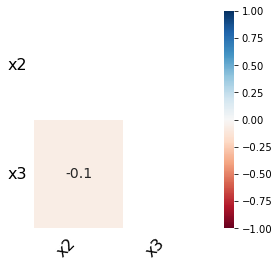

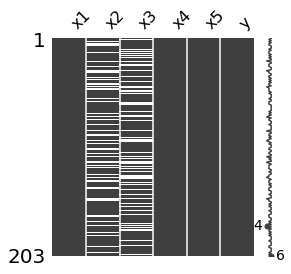

In [23]:
ds1 = df.copy()
mcar_mask = MCAR_mask(ds1[cols_w_missing].values, 0.2)
for i, col in enumerate(cols_w_missing):
    mask = mcar_mask[:, i]
    ds1.loc[mask, col] = np.nan

show_missingness(ds1)

As it can be seen from the missingno heatmap for ds1 above, there is no correlation between variables' missingness.

Missing rates
x1    0.290640
x2    0.256158
x3    0.270936
x4    0.251232
x5    0.285714
y     0.000000
dtype: float64


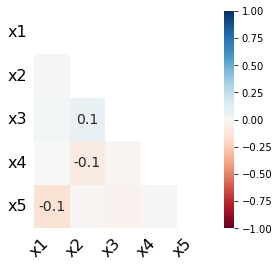

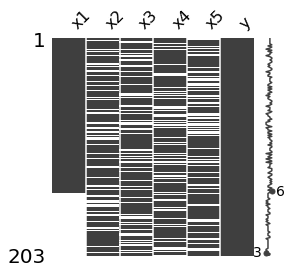

In [24]:
cat_cols = df.columns[df.dtypes == 'category'].tolist()
ds2 = df.copy()
ds2[cat_cols] = ds2[cat_cols].apply(lambda x: x.cat.codes).astype('float')

columns = list(ds2.columns)
input_idxs = [columns.index(col) for col in columns[:-1]]
target_idxs = [columns.index(col) for col in cols_w_missing]
mnar_mask = MNAR_mask_logistic2(ds2.values, 0.25, input_idxs=input_idxs, target_idxs=target_idxs)
ds2[mnar_mask] = np.nan

show_missingness(ds2)

Missing rates
x1    0.290640
x2    0.231527
x3    0.236453
x4    0.206897
x5    0.261084
y     0.000000
dtype: float64


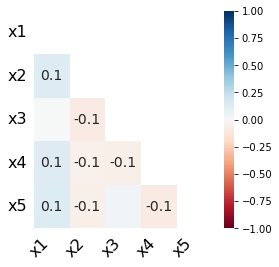

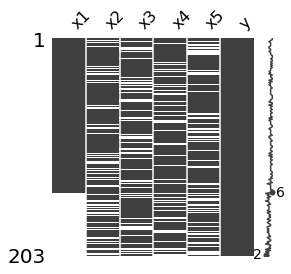

In [25]:
cat_cols = df.columns[df.dtypes == 'category'].tolist()
ds3 = df.copy()
ds3[cat_cols] = ds3[cat_cols].apply(lambda x: x.cat.codes).astype('float')

columns = list(ds3.columns)
input_idxs = [columns.index(col) for col in columns[:-1]]
target_idxs = [columns.index(col) for col in cols_w_missing]
mnar_mask = MNAR_mask_logistic2(ds3.values, 0.25, input_idxs=input_idxs, target_idxs=target_idxs)
ds3[mnar_mask] = np.nan

show_missingness(ds3)

Missing rates
x1    0.000000
x2    0.128079
x3    0.394089
x4    0.000000
x5    0.000000
y     0.000000
dtype: float64


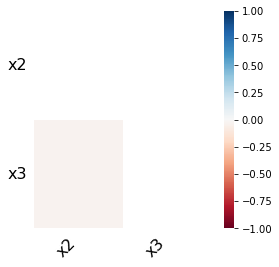

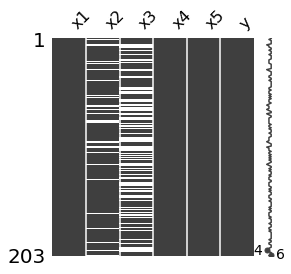

In [26]:
cat_cols = df.columns[df.dtypes == 'category'].tolist()
ds32 = df.copy()
ds32[cat_cols] = ds32[cat_cols].apply(lambda x: x.cat.codes).astype('float')

mnar_mask = MNAR_self_mask_logistic(ds32[cols_w_missing].values, 0.30)
for i, col in enumerate(cols_w_missing):
    mask = mnar_mask[:, i]
    ds32.loc[mask, col] = np.nan

show_missingness(ds32)

### Select DS1

In [27]:
from scipy import stats

In [28]:
def chi2_test(df, col1, col2):
    print("="*16)
    print(f"Chi2 test with {col1} {col2}")
    print("="*16)
    tab = pd.crosstab(df[col1], df[col2].isna())
    print(tab)
    chi2, p, dof, ex = stats.chi2_contingency(tab)
    print("p value:%.4f" % p)
    if p<0.05:    
        print(f"Missingness of {col1} is not independent of {col2}")
    else:
        print(f"Missingness of {col1} is independent of {col2}")
    print("="*16)


In [29]:
for mcol in cols_w_missing:
    for col in ds1.columns:
        if mcol == col:
            continue

        chi2_test(ds1, mcol, col)

Chi2 test with x2 x1
x1      False
x2           
low        25
medium    107
high       21
p value:1.0000
Missingness of x2 is independent of x1
Chi2 test with x2 x3
x3      False  True
x2                 
low        17     8
medium     75    32
high       16     5
p value:0.8143
Missingness of x2 is independent of x3
Chi2 test with x2 x4
x4      False
x2           
low        25
medium    107
high       21
p value:1.0000
Missingness of x2 is independent of x4
Chi2 test with x2 x5
x5      False
x2           
low        25
medium    107
high       21
p value:1.0000
Missingness of x2 is independent of x5
Chi2 test with x2 y
y       False
x2           
low        25
medium    107
high       21
p value:1.0000
Missingness of x2 is independent of y
Chi2 test with x3 x1
x1  False
x3       
A      10
B      41
C      37
D      59
p value:1.0000
Missingness of x3 is independent of x1
Chi2 test with x3 x2
x2  False  True
x3             
A       7     3
B      34     7
C      22    15
D      45  

With Chi square tests, it can be confirmed that the missing values of x2 and x3 are independent of from other variables. Hence, the missing mechanism is proven to be MCAR.

### Train a model with DS1

In [30]:
ds1.head(5)

,x1,x2,x3,x4,x5,y
0,3.0,medium,B,71.873535,77.279945,0.0
1,2.0,medium,C,76.329697,123.509766,3.0
3,1.0,NaN,NaN,90.894951,131.080124,0.0
4,1.0,NaN,B,91.377548,78.421425,1.0
5,2.0,low,D,82.418663,128.847290,0.0


To split the dataset into train and test sets, we can use `scikit-learn`'s `train_test_split` method. To ensure that
missing values split evenly, we can use `stratify` option with missingness mask as labels. 

In [31]:
from sklearn.model_selection import train_test_split

missingness_mask = ds1.isna().any(axis=1).values
feat_vars = ['x1', 'x2', 'x3', 'x4', 'x5']
target_vars = ['y']
X = ds1[feat_vars]
y = ds1[target_vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=missingness_mask)

In [32]:
print("Missing rate of train set")
print("="*16)
print(missing_rate_of(X_train.isna().any(axis=1)))
print("="*16)
print("Missing rate of test set")
print("="*16)
print(missing_rate_of(X_test.isna().any(axis=1)))
print("="*16)

Missing rate of train set
0.4647887323943662
Missing rate of test set
0.47540983606557374


The missingness rates in train and test set are similar, so missing values have been split evenly.

Let's see how many missing values are there in train and test datasets.

In [ ]:
for name, dfx in [('Train', X_train), ('Test', X_test)]:
    print(f'{name} dataset')
    print('='*32)
    for col in cols_w_missing:
        print(f'Num missing values in {col}: {dfx[col].isna().sum()}')
    print('='*32)

### Training utilities

A few utility function to encode categorical variables

In [33]:
def encode_cat(x):
    cat_cols = x.columns[x.dtypes == 'category'].tolist()
    x = x.copy()
    x[cat_cols] = x[cat_cols].apply(lambda c: c.cat.codes).astype('float')
    return x

In [34]:
def prepare_cat_cols(df):
    df = df.copy()
    cat_cols = df.columns[df.dtypes == 'category'].tolist()
    df[cat_cols] = df[cat_cols].apply(lambda c: c.cat.codes)
    for col in cat_cols:
        df.loc[df[col]==-1, col] = np.nan
    return df

We'll use random forest classifier to train predictive models with our dataset. 
Let's create a few utility functions for training a model and evaluation its accuracy score.

In [35]:
from sklearn.ensemble import RandomForestClassifier

def rf(xs, y, n_estimators=40, max_features=0.5, min_samples_leaf=5, oob_score=True, **kwargs):
    m = RandomForestClassifier(
        n_jobs=-1, 
        n_estimators=n_estimators,
        max_features=max_features,
        min_samples_leaf=min_samples_leaf, 
        oob_score=True
    )
    return m.fit(xs, y)

def train_score(X_train, y_train, X_test, y_test):
    X_train = encode_cat(X_train)
    y_train = encode_cat(y_train)
    X_test = encode_cat(X_test)
    y_test = encode_cat(y_test)

    m = rf(X_train.values, y_train.values.ravel())
    print(f"Train accuracy: {m.score(X_train.values, y_train.values.ravel())}")
    print(f"Valid accuracy: {m.score(X_test.values, y_test.values.ravel())}")

### Imputation

#### Most frequent value imputation

We'll impute missing values with most frequent values for categorical variables x2 and x3. 
Let's see the value frequencies for those variables in train set.

In [36]:
for col in cols_w_missing:
    print(f'Variable {col}')
    print('='*32)
    print(X_train[col].value_counts().sort_values())
    print('='*32)

Variable x2
high      13
low       18
medium    77
Name: x2, dtype: int64
Variable x3
A     9
B    24
C    25
D    45
Name: x3, dtype: int64


In [37]:
def impute_most_freq(subset, x_train, x):
    x = x.copy()
    for col in subset:
        mfreq = x_train[col].value_counts().sort_values().index[-1]
        x[col].fillna(mfreq, inplace=True)
    return x

Let's impute our train and test set with most frequent imputation. 
Then, let's train a random forest classifier with most frequent imputation and calculate accuracy score.

In [38]:
X_train_imputed_mf = impute_most_freq(cols_w_missing, X_train, X_train)
X_test_imputed_mf = impute_most_freq(cols_w_missing, X_train, X_test)

print("Missing rates after imputation")
print("="*32)
print("Train set")
print("="*32)
print(missing_rate_of(X_train_imputed_mf.isna()))
print("="*32)
print("Test set")
print("="*32)
print(missing_rate_of(X_test_imputed_mf.isna()))
print("="*32)

train_score(X_train_imputed_mf, y_train, X_test_imputed_mf, y_test)

Missing rates after imputation
Train set
x1    0.0
x2    0.0
x3    0.0
x4    0.0
x5    0.0
dtype: float64
Test set
x1    0.0
x2    0.0
x3    0.0
x4    0.0
x5    0.0
dtype: float64
Train accuracy: 0.7887323943661971
Valid accuracy: 0.7213114754098361


#### Imputation with MICE

Let's impute the missing values with multivariate feature imputation. We'll use sklearn's `IterativeImputer` class for this.

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# convert categorical values to numeric
X_train_pre_mice = prepare_cat_cols(X_train)
y_train_pre_mice = prepare_cat_cols(y_train)
X_test_pre_mice = prepare_cat_cols(X_test)
y_test_pre_mice = prepare_cat_cols(y_test)

# fit imputer with train dataset
imp = IterativeImputer(max_iter=10, random_state=42)
imp.fit(X_train_pre_mice)

# transform train and test datasets with fitted imputer
X_train_post_mice = pd.DataFrame(imp.transform(X_train_pre_mice), columns=X_train_pre_mice.columns)
X_test_post_mice = pd.DataFrame(imp.transform(X_test_pre_mice), columns=X_test_pre_mice.columns)

# validate that there are no missing values after imputation
print("Missing rate of train set")
print("="*32)
print(missing_rate_of(X_train_post_mice.isna().any(axis=1)))
print("="*32)
print("Missing rate of test set")
print("="*32)
print(missing_rate_of(X_test_post_mice.isna().any(axis=1)))
print("="*32)

# train and evaluate 
train_score(X_train_post_mice, y_train, X_test_post_mice, y_test)

Missing rate of train set
0.0
Missing rate of test set
0.0
Train accuracy: 0.8309859154929577
Valid accuracy: 0.7213114754098361
